**Task
Load the iris dataset using scikit-learn**.

Split the dataset into training and testing sets with 70% of the data for training and 30% for testing.

Train a decision tree classifier using the entropy criterion and evaluate its accuracy on the testing set.

Train another decision tree classifier using the gini criterion and evaluate its accuracy on the testing set.

Compare the performance of the two classifiers and discuss the differences in terms of accuracy.

Visualize the decision tree for each classifier and compare the tree structure and feature importance.

Note: You can use the tree.plot_tree() function to visualize the decision tree, and the feature_importances_ attribute to get the feature importances for each classifier.

The feature importance values can be used to understand which features have the strongest association with the target variable and how they contribute to the model's prediction.

In [1]:
#imports
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import pandas as pd
import numpy as np



# Visualization imports
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = load_iris()

In [3]:
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
data.keys()
data['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [5]:
df = pd.DataFrame(data.data, columns = data.feature_names)
df['target'] = data.target

df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
df.shape

(150, 5)

In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target'],
      dtype='object')

In [8]:
X = df.iloc[:,:-1]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [9]:
y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [10]:
# Split the data into training and testing sets with 70% of the data for training and 30% for testing
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.3, random_state=0)

In [11]:
X_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [12]:
X_test

array([[5.8, 2.8, 5.1, 2.4],
       [6. , 2.2, 4. , 1. ],
       [5.5, 4.2, 1.4, 0.2],
       [7.3, 2.9, 6.3, 1.8],
       [5. , 3.4, 1.5, 0.2],
       [6.3, 3.3, 6. , 2.5],
       [5. , 3.5, 1.3, 0.3],
       [6.7, 3.1, 4.7, 1.5],
       [6.8, 2.8, 4.8, 1.4],
       [6.1, 2.8, 4. , 1.3],
       [6.1, 2.6, 5.6, 1.4],
       [6.4, 3.2, 4.5, 1.5],
       [6.1, 2.8, 4.7, 1.2],
       [6.5, 2.8, 4.6, 1.5],
       [6.1, 2.9, 4.7, 1.4],
       [4.9, 3.6, 1.4, 0.1],
       [6. , 2.9, 4.5, 1.5],
       [5.5, 2.6, 4.4, 1.2],
       [4.8, 3. , 1.4, 0.3],
       [5.4, 3.9, 1.3, 0.4],
       [5.6, 2.8, 4.9, 2. ],
       [5.6, 3. , 4.5, 1.5],
       [4.8, 3.4, 1.9, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [6.2, 2.8, 4.8, 1.8],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.8, 1.9, 0.4],
       [6.2, 2.9, 4.3, 1.3],
       [5. , 2.3, 3.3, 1. ],
       [5. , 3.4, 1.6, 0.4],
       [6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2

In [13]:
y_train

array([1, 2, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 0, 2, 1, 1, 1, 1,
       2, 0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 1, 2, 1, 0, 2, 2, 2, 2, 0, 0,
       2, 2, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 2, 0, 0, 2, 0, 2, 1, 1, 1, 2, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [14]:
y_test

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0])

In [15]:
print(type(X_train), X_train.shape )
print(type(X_test), X_test.shape )

print(type(y_train), y_train.shape )
print(type(y_test), y_test.shape )

<class 'numpy.ndarray'> (105, 4)
<class 'numpy.ndarray'> (45, 4)
<class 'numpy.ndarray'> (105,)
<class 'numpy.ndarray'> (45,)


In [16]:
X_train

array([[5. , 2. , 3.5, 1. ],
       [6.5, 3. , 5.5, 1.8],
       [6.7, 3.3, 5.7, 2.5],
       [6. , 2.2, 5. , 1.5],
       [6.7, 2.5, 5.8, 1.8],
       [5.6, 2.5, 3.9, 1.1],
       [7.7, 3. , 6.1, 2.3],
       [6.3, 3.3, 4.7, 1.6],
       [5.5, 2.4, 3.8, 1.1],
       [6.3, 2.7, 4.9, 1.8],
       [6.3, 2.8, 5.1, 1.5],
       [4.9, 2.5, 4.5, 1.7],
       [6.3, 2.5, 5. , 1.9],
       [7. , 3.2, 4.7, 1.4],
       [6.5, 3. , 5.2, 2. ],
       [6. , 3.4, 4.5, 1.6],
       [4.8, 3.1, 1.6, 0.2],
       [5.8, 2.7, 5.1, 1.9],
       [5.6, 2.7, 4.2, 1.3],
       [5.6, 2.9, 3.6, 1.3],
       [5.5, 2.5, 4. , 1.3],
       [6.1, 3. , 4.6, 1.4],
       [7.2, 3.2, 6. , 1.8],
       [5.3, 3.7, 1.5, 0.2],
       [4.3, 3. , 1.1, 0.1],
       [6.4, 2.7, 5.3, 1.9],
       [5.7, 3. , 4.2, 1.2],
       [5.4, 3.4, 1.7, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [6.9, 3.1, 4.9, 1.5],
       [4.6, 3.1, 1.5, 0.2],
       [5.9, 3. , 5.1, 1.8],
       [5.1, 2.5, 3. , 1.1],
       [4.6, 3.4, 1.4, 0.3],
       [6.2, 2

In [17]:
# for later use
df1 = pd.DataFrame(X_train, columns=['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)',	'petal width (cm)'])
df1

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,2.0,3.5,1.0
1,6.5,3.0,5.5,1.8
2,6.7,3.3,5.7,2.5
3,6.0,2.2,5.0,1.5
4,6.7,2.5,5.8,1.8
...,...,...,...,...
100,4.9,3.1,1.5,0.1
101,6.3,2.9,5.6,1.8
102,5.8,2.7,4.1,1.0
103,7.7,3.8,6.7,2.2


In [18]:
# decision tree classifier with the entropy criterion and a maximum depth of 4
DTC_Model_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

# fit the classifier to the training data
DTC_Model_entropy.fit(X_train, y_train)

# predictions on the testing data
y_pred_entropy = DTC_Model_entropy.predict(X_test)

# accuracy of the classifier on the testing data using entropy criterion
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)

print("Accuracy using the entropy criterion:", accuracy_entropy)



Accuracy using the entropy criterion: 0.9777777777777777


In [19]:
# decision tree classifier with the gini criterion and a maximum depth of 4
DTC_Model_gini = DecisionTreeClassifier(criterion='gini', max_depth=4, random_state=10)

# fit the classifier to the training data
DTC_Model_gini.fit(X_train, y_train)

# predictions on the testing data
y_pred_gini = DTC_Model_gini.predict(X_test)

# accuracy of the classifier on the testing data using gini criterion
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print("Accuracy using the gini criterion:", accuracy_gini)


Accuracy using the gini criterion: 0.9777777777777777


To compare the performance of the two classifiers, we can compare their accuracy scores. The classifier with a higher accuracy score is better but in this particular example we have same accuracy score i.e 97% in both classifier predictions

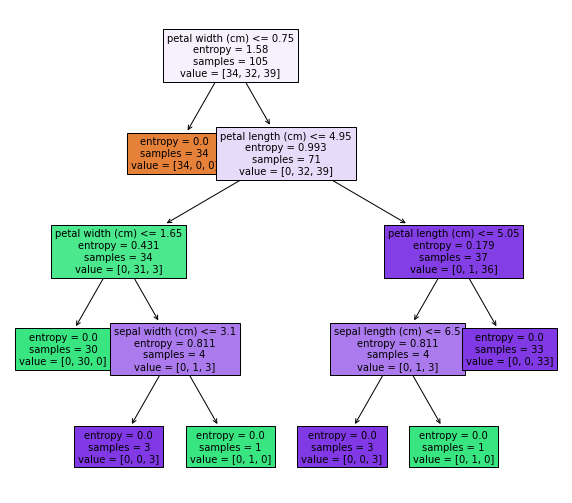

In [20]:
# Visualize the decision tree for the entropy criterion
plt.figure(figsize=(10, 9))
DTC_tree_entropy = tree.plot_tree(DTC_Model_entropy, filled=True, 
                                  feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                                  fontsize=10)
plt.show()


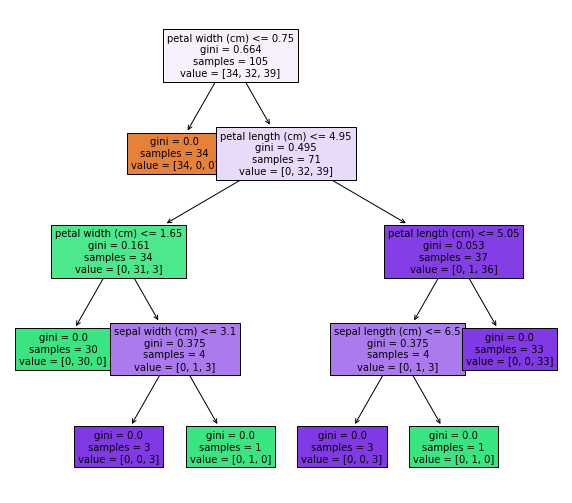

In [21]:
# Visualize the decision tree for the gini criterion
plt.figure(figsize=(10, 9))
DTC_tree_gini = tree.plot_tree(DTC_Model_gini, filled=True, 
                               feature_names=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
                               fontsize=10)
plt.show()

In [22]:
# Get the feature importances for each classifier
feature_importances_entropy = DTC_Model_entropy.feature_importances_
feature_importances_gini = DTC_Model_gini.feature_importances_

# Print the feature importances for each classifier
print("Feature importances using the entropy criterion:", feature_importances_entropy)
print("Feature importances using the gini criterion:", feature_importances_gini)

Feature importances using the entropy criterion: [0.01956167 0.01956167 0.31718038 0.64369628]
Feature importances using the gini criterion: [0.02150464 0.02150464 0.40406279 0.55292793]


In [23]:
df2 = pd.DataFrame({'Feature_names':df1.columns, 'Feature_Importances':feature_importances_entropy})
df2 = df2.sort_values(by='Feature_Importances', ascending= False)
df2

,Feature_names,Feature_Importances
3,petal width (cm),0.643696
2,petal length (cm),0.317180
0,sepal length (cm),0.019562
1,sepal width (cm),0.019562


In [24]:
df3 = pd.DataFrame({'Feature_names':df1.columns, 'Feature_Importances':feature_importances_gini})
df3 = df3.sort_values(by='Feature_Importances', ascending= False)
df3

,Feature_names,Feature_Importances
3,petal width (cm),0.552928
2,petal length (cm),0.404063
0,sepal length (cm),0.021505
1,sepal width (cm),0.021505


In [25]:
df2 = df2.sort_values(by='Feature_Importances', ascending= False)
df2

,Feature_names,Feature_Importances
3,petal width (cm),0.643696
2,petal length (cm),0.317180
0,sepal length (cm),0.019562
1,sepal width (cm),0.019562


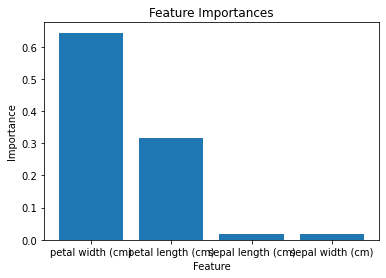

In [26]:
plt.bar(df2['Feature_names'], df2['Feature_Importances'])
# Add x and y labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

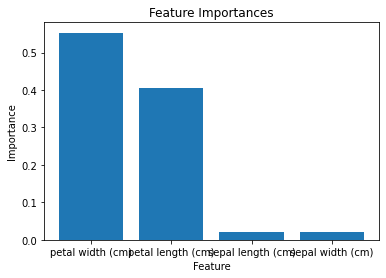

In [27]:
plt.bar(df3['Feature_names'], df3['Feature_Importances'])
# Add x and y labels and title
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()